<a href="https://colab.research.google.com/github/3mgai22rm72yn3/Regress-o-Linear-M-ltipla/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# K-means

In [ ]:
mat = loadmat('ex7data2.mat')
X = mat['X']

- Function Find Clossed Centroids
<p>
  
</p>
<p>
<div style="text-align: justify"> Vamos definir uma função que dado determinado conjuntos de dados (conjunto X, ou matriz de design X) essa função vai retornar o índice do centróide mais próximo de cada linha, que corresponde a cada exemplo de treinamento da matriz X  </div>
</p>
<p>
<div style="text-align: justify"> Essa função vai receber a matriz de dados X e os vetores de centróides (queremos encontrar o índice de centróide mais próximo). </div>
</p>

    - Primeiro vou encontrar o nº de centróides (nº de grupos),  lembrando que cada centróide é 1 vetor com mesmo tamnho do nº de atributos
        - ele tem em cada coluna o nº de atributos e em cada linha o nº de centróide
    - Vamos definir o vetor idx, que vai armazenar os índices de cada amostra que vai ter o tamanho de linhas da matriz X (nº de exemplos de treinamento basicamente)
    - tem, variável temporária que vai armazenar as distâncias para encontrar o centróide que tem a distância mais próxima
    - Vou começar com meu laço procurando o centroide mais próximo e calcular a distância de cada exemplo de treinamento para cada centróide, somo par procurar a distância e eleve ao quadrado
    - lenght --> somo para calcular a distância e elevo oa quadrado, elevo cada componete ao quadrado (soma das diferenças ao quadrado)
    - temp[j] --> quero encontrar o grupo com menor comprimento, por isso coloco um comprimento par cada grupo, para depois encontrar qual o índice que gra o menor comprimento
    - idx[i] --> vai ser o índice que tem o menor valor de temp, a gente obtem isso pela função argmin
    - depois vamor retornar o idx, que é a variável que realmente interessa, pois é o índice do grupo mais próximo a cada exemplo de treinamento na matriz X


In [ ]:
def findClosestCentroids(X,centroids):
    K = centroids.shape[0] #para retornar o nº de centróide
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))

    for i in range(X.shape[0]): # isso para cada exemplo, e j vai varer cada grupo
        for j in range(K):
            dist = X[i,:]-centroids[j,:] # distância entre vetores
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx


#### Exemplo

In [ ]:

# Essa parte (priemro exemplo de execução do algoritmo) não dá para fazer porque meus dados tem 1024 atributos.
K=3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X,initial_centroids)
print("Clesest Centroids for the first 3 examples:\n", idx[0:3])


Clesest Centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


 #### Vamos começar com exemplos mais complexos, ceomeçando com a atualização dos centróides

In [ ]:
def computeCentroids(X,idx,K):
    m,n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))

    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:] += X[i,:]
        count +=1
    return centroids/count


In [ ]:
def plotKmeans(X,centroids,idx,K,num_iters):

    m,n = X.shape[0],X.shape[1]

    fig,ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))

    for i in range(num_iters):
        color='rgb'
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker='x',c='black',linewidth=3)
        title = 'Número de interações'+str(i+1)
        ax[i].set_title(title)

        centroids = computeCentroids(X,idx,K)
        idx = findClosestCentroids(X,centroids)

    plt.tight_layout()

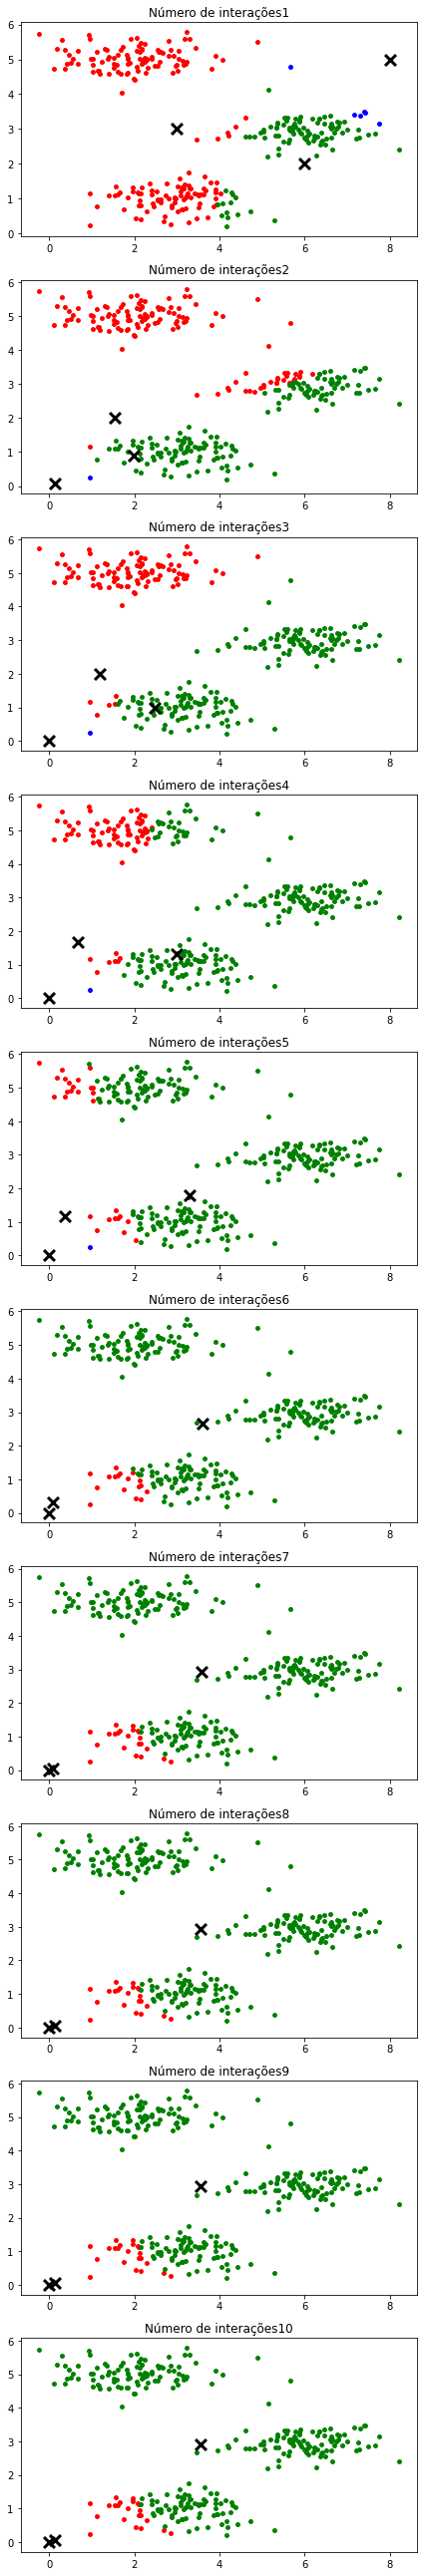

In [ ]:
m,n = X.shape[0],X.shape[1]
plotKmeans(X,initial_centroids,idx,K,10)